In [100]:
import os
import sys
sys.path.append('..')

import torch
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.io import decode_image
from torchvision.models.feature_extraction import create_feature_extractor

import matplotlib.pyplot as plt

from src.image_process import show_image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Load a Pre-trained Model

In [2]:
# cache weights to a project folder
os.environ['TORCH_HOME'] = '../cache'

In [3]:
# Init model with pre-trained weights
pre_trained_weights = ResNet50_Weights.IMAGENET1K_V2
model = resnet50(weights=pre_trained_weights)

# Set model to eval mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
# Get data transforms
process = pre_trained_weights.transforms()

In [5]:
process

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [57]:
# get classes names
imagenet_classes = pre_trained_weights.meta["categories"]
len(imagenet_classes)

1000

In [88]:
# Import a image
img_path = '../data/deep_fashion2_test/test/image/000040.jpg'
img = decode_image(img_path)

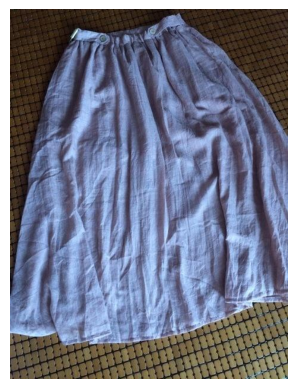

In [89]:
show_image(img)

In [90]:
model_input = process(img)

In [91]:
model_input = model_input.unsqueeze(0)
model_input.size()

torch.Size([1, 3, 224, 224])

In [92]:
with torch.no_grad():
    model_output = model(model_input)
    proba = torch.softmax(model_output, dim=1)

In [93]:
pred_cate = imagenet_classes[proba.argmax(dim=1).item()]
pred_cate

'swimming trunks'

# 2. Visualize Output from each Block

In [102]:
return_node = {
    "layer1": "block1",
    "layer2": "block2",
    "layer3": "block3",
    "layer4": "block4",
}

In [103]:
feat_extractor = create_feature_extractor(model, return_nodes=return_node)

In [104]:
with torch.no_grad():
    features = feat_extractor(model_input)

In [151]:
feat_by_block = features['block1'].squeeze(0)
feat_by_block.size()

torch.Size([256, 56, 56])

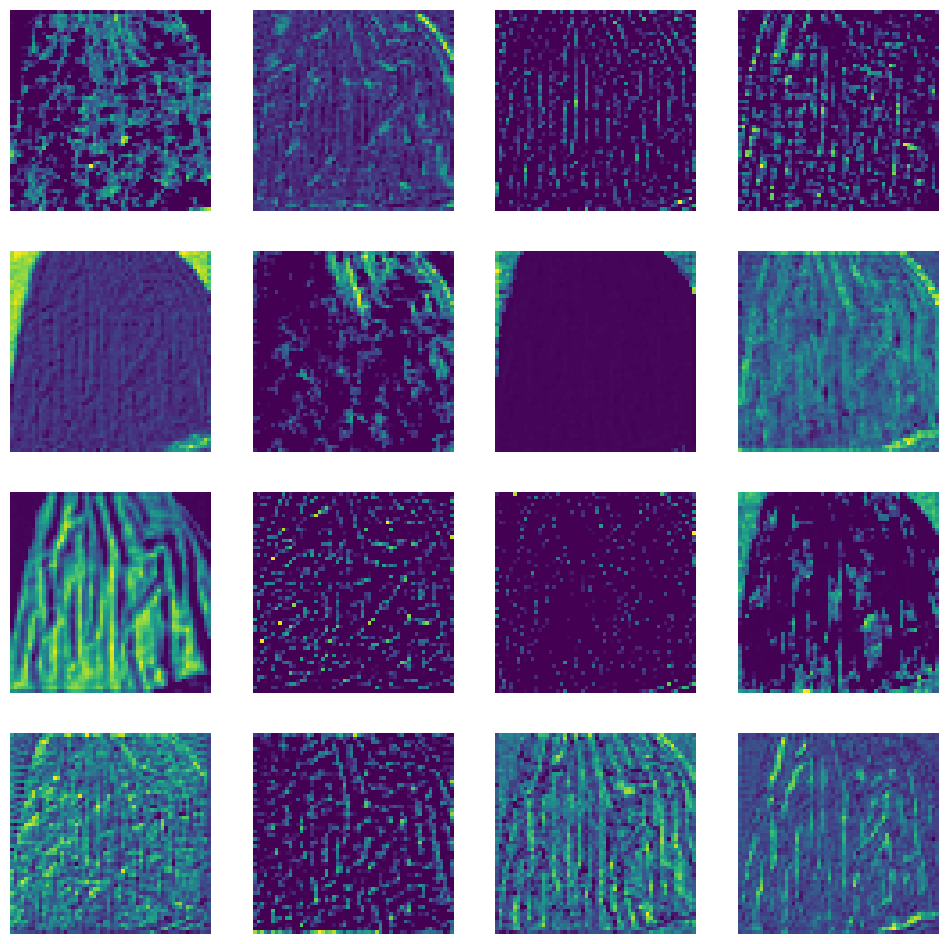

In [152]:
fig ,axes = plt.subplots(4, 4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(feat_by_block[i].cpu(), cmap='viridis')
    ax.axis("off")

plt.show()

In [ ]:
# Next step:
# 1. Remove some layers: use extractor or rebuild a model
# 2. Compare similarities: suitability; test on some samples
# 3. Create a image database
# 4. Embed the image database using FAISS
# 5. Try to retrieve an image
# 6. Design an evaluation pipeline: metrics; pipeline code.